In [5]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import geopandas as gpd

df = pd.read_csv("../CSV/2010-2021.csv")

# create grouping of data using specified column
groupby_borough = df.groupby(['BOROUGH'])

# creates a copy of specified entry within the column group
queens = groupby_borough.get_group(('QUEENS',)).copy()
queens.drop('LOWEST SALE PRICE', axis=1, inplace=True)
queens.drop('HIGHEST SALE PRICE', axis=1, inplace=True)

# group further by home type
groupby_home = queens.groupby(['TYPE OF HOME'])
three = groupby_home.get_group(('03 THREE FAMILY HOMES',)).copy()

# set up to do regession 
hood_names_three = three['NEIGHBORHOOD'].unique()
groupby_hood = three.groupby(['NEIGHBORHOOD'])
# addresses small samples
small_sample = ["NEPONSIT", "JAMAICA BAY"] 

# prediction model
dic_three = {}
for h in hood_names_three:
    temp = groupby_hood.get_group((h,)).copy()
    # print(h)
    if h in small_sample:
        dic_three[h] = temp['AVERAGE SALE PRICE'].item()
    else:
        X = temp[['YEAR', 'MEDIAN SALE PRICE', 'NUMBER OF SALES']]
        y = temp['AVERAGE SALE PRICE']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        dic_three[h] = y_pred[0]

# map of neighborhood
shape = gpd.read_file("../nynta2020_24b/nynta2020.shp")

# removes all borough that isn't the working set
to_drop = shape[shape["BoroName"] != "Queens"].index 
shape.drop(to_drop, inplace=True) 

# removes all other columns that we don't really care for
shape = shape.drop(columns=["BoroCode", "BoroName", "CountyFIPS", "NTA2020", "NTAAbbrev", "NTAType", "CDTA2020", "Shape_Leng", "Shape_Area", "CDTAName"])

In [6]:
hood_names_three

array(['ARVERNE', 'ASTORIA', 'BAYSIDE', 'BELLE HARBOR', 'BELLEROSE',
       'BRIARWOOD', 'COLLEGE POINT', 'CORONA', 'EAST ELMHURST',
       'ELMHURST', 'FAR ROCKAWAY', 'FLORAL PARK', 'FLUSHING-NORTH',
       'FLUSHING-SOUTH', 'FOREST HILLS', 'GLENDALE', 'HAMMELS', 'HOLLIS',
       'HOWARD BEACH', 'JACKSON HEIGHTS', 'JAMAICA', 'JAMAICA ESTATES',
       'JAMAICA HILLS', 'KEW GARDENS', 'LONG ISLAND CITY', 'MASPETH',
       'MIDDLE VILLAGE', 'OAKLAND GARDENS', 'OZONE PARK',
       'QUEENS VILLAGE', 'REGO PARK', 'RICHMOND HILL', 'RIDGEWOOD',
       'ROCKAWAY PARK', 'ROSEDALE', 'SO. JAMAICA-BAISLEY PARK',
       'SOUTH JAMAICA', 'SOUTH OZONE PARK', 'SPRINGFIELD GARDENS',
       'ST. ALBANS', 'SUNNYSIDE', 'WHITESTONE', 'WOODHAVEN', 'WOODSIDE',
       'BEECHHURST', 'DOUGLASTON', 'HOLLISWOOD', 'LITTLE NECK',
       'QUEENS-UNKNOWN', 'FRESH MEADOWS', 'HILLCREST', 'LAURELTON',
       'NEPONSIT', 'GLEN OAKS', 'AIRPORT LA GUARDIA',
       'FLUSHING MEADOW PARK', 'JAMAICA BAY'], dtype=object)

In [9]:
pairs = {
    'Astoria (North)-Ditmars-Steinway': 'ASTORIA',
    'Old Astoria-Hallets Point': None,
    'Astoria (Central)': 'ASTORIA',
    'Astoria (East)-Woodside (North)': 'WOODSIDE',
    'Queensbridge-Ravenswood-Dutch Kills': None,
    'Sunnyside Yards (North)': None,
    "St. Michael's Cemetery": None,
    'Astoria Park': None,
    'Long Island City-Hunters Point': 'LONG ISLAND CITY',
    'Sunnyside': 'SUNNYSIDE',
    'Woodside': 'WOODSIDE',
    'Sunnyside Yards (South)': None,
    'Calvary & Mount Zion Cemeteries': None,
    'Jackson Heights': 'JACKSON HEIGHTS',
    'East Elmhurst': 'EAST ELMHURST',
    'North Corona': 'CORONA',
    'Elmhurst': 'ELMHURST',
    'Corona': 'CORONA',
    'Maspeth': 'MASPETH',
    'Ridgewood': 'RIDGEWOOD',
    'Glendale': 'GLENDALE',
    'Middle Village': 'MIDDLE VILLAGE',
    'Mount Olivet & All Faiths Cemeteries': None,
    'Middle Village Cemetery': None,
    'St. John Cemetery': None,
    'Highland Park-Cypress Hills Cemeteries (North)': None,
    'Rego Park': 'REGO PARK',
    'Forest Hills': 'FOREST HILLS',
    'College Point': 'COLLEGE POINT',
    'Whitestone-Beechhurst': 'BEECHHURST',
    'Bay Terrace-Clearview': None,
    'Murray Hill-Broadway Flushing': None,
    'East Flushing': 'FLUSHING-NORTH',
    'Queensboro Hill': None,
    'Flushing-Willets Point': 'FLUSHING-NORTH',
    'Fort Totten': None,
    'Kissena Park': None,
    'Kew Gardens Hills': 'KEW GARDENS',
    'Pomonok-Electchester-Hillcrest': None,
    'Fresh Meadows-Utopia': 'FRESH MEADOWS',
    'Jamaica Estates-Holliswood': 'HOLLISWOOD',
    'Jamaica Hills-Briarwood': 'BRIARWOOD',
    'Mount Hebron & Cedar Grove Cemeteries': None,
    'Cunningham Park': None,
    'Kew Gardens': 'KEW GARDENS',
    'Richmond Hill': 'RICHMOND HILL',
    'South Richmond Hill': None,
    'Ozone Park (North)': 'OZONE PARK',
    'Woodhaven': 'WOODHAVEN',
    'South Ozone Park': 'SOUTH OZONE PARK',
    'Ozone Park': 'OZONE PARK',
    'Howard Beach-Lindenwood': 'HOWARD BEACH',
    'Spring Creek Park': None,
    'Auburndale': None,
    'Bayside': 'BAYSIDE',
    'Douglaston-Little Neck': 'DOUGLASTON',
    'Oakland Gardens-Hollis Hills': 'OAKLAND GARDENS',
    'Alley Pond Park': None,
    'Jamaica': 'JAMAICA',
    'South Jamaica': 'SOUTH JAMAICA',
    'Baisley Park': 'SO. JAMAICA-BAISLEY PARK',
    'Springfield Gardens (North)-Rochdale Village': 'SPRINGFIELD GARDENS',
    'St. Albans': 'ST. ALBANS',
    'Hollis': 'HOLLIS',
    'Glen Oaks-Floral Park-New Hyde Park': 'FLORAL PARK',
    'Bellerose': 'BELLEROSE',
    'Queens Village': 'QUEENS VILLAGE',
    'Cambria Heights': None,
    'Laurelton': 'LAURELTON',
    'Springfield Gardens (South)-Brookville': 'SPRINGFIELD GARDENS',
    'Rosedale': 'ROSEDALE',
    'Montefiore Cemetery': None,
    'Far Rockaway-Bayswater': 'FAR ROCKAWAY',
    'Rockaway Beach-Arverne-Edgemere': 'ARVERNE',
    'Breezy Point-Belle Harbor-Rockaway Park-Broad Channel': 'BELLE HARBOR',
    'Rockaway Community Park': None,
    'LaGuardia Airport': 'AIRPORT LA GUARDIA',
    'Flushing Meadows-Corona Park': 'FLUSHING MEADOW PARK',
    'Forest Park': None,
    'John F. Kennedy International Airport': None,
    'Jamaica Bay (East)': 'JAMAICA BAY',
    'Jacob Riis Park-Fort Tilden-Breezy Point Tip': 'NEPONSIT'
}


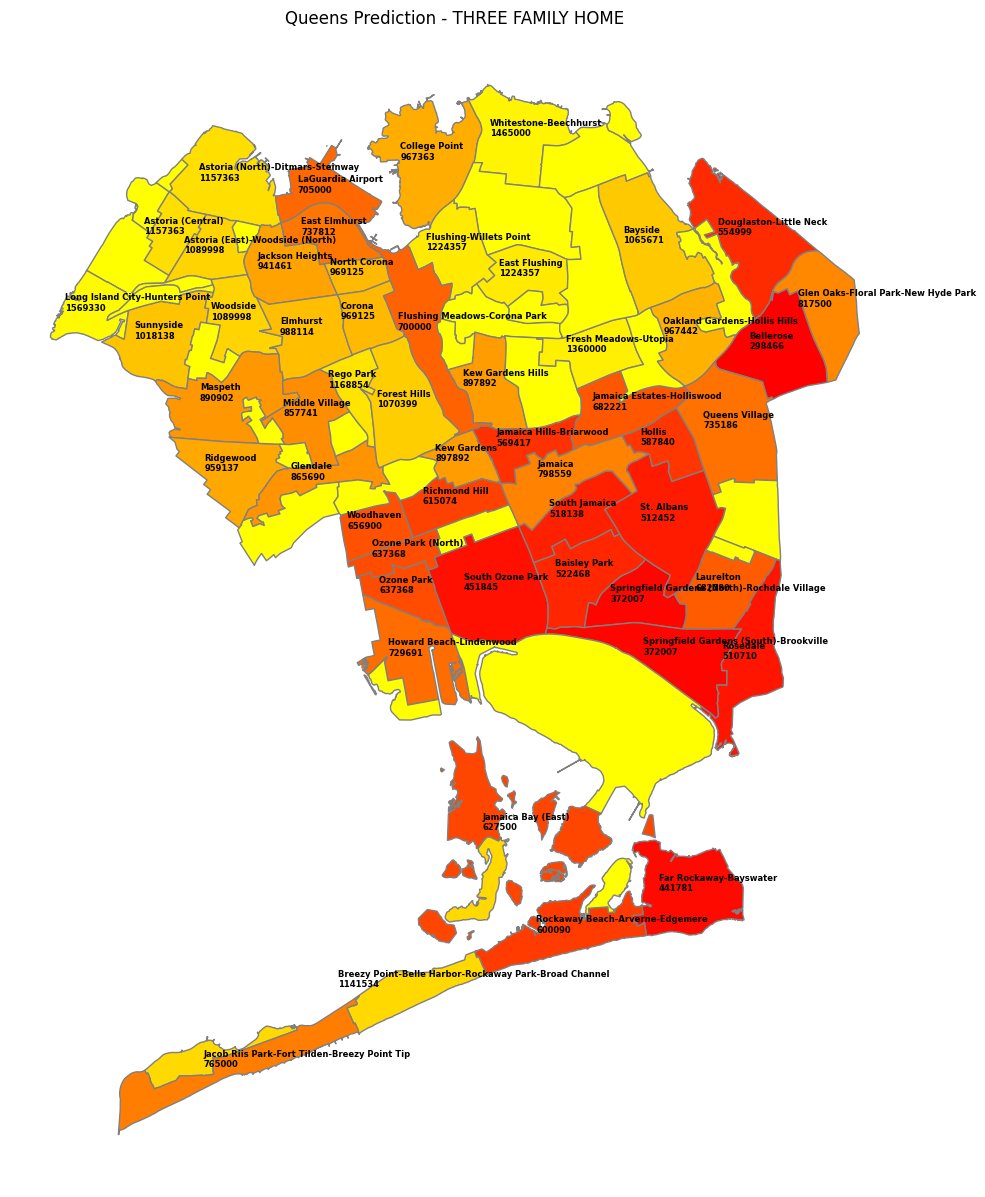

In [11]:
import matplotlib.pyplot as plt

shape['sales'] = "-"

# adding sales data to overall df
for i, row in shape.iterrows():
    holder = pairs[row['NTAName']]
    if holder:
        if isinstance(holder, list):
            sum = 0
            for e in holder:
                sum += dic_three[e]
            shape.at[i, 'sales'] = int(sum/len(holder))
        else:
            shape.at[i, 'sales'] = int(dic_three[holder])

# sets map settings
shape_map = shape.plot(column='sales', k=8, cmap='autumn', figsize=(30,15), linewidth=1, edgecolor='0.5')
# adds labels to map
for i, row in shape.iterrows():
    x = row['geometry'].centroid.x
    y = row['geometry'].centroid.y
    if row['sales'] != "-" :
        label = row['NTAName'] + "\n" + str(row['sales'])
        shape_map.annotate(label, xy=(x, y), xytext=(-20, 0), color="black", textcoords="offset points", fontsize=6, weight="bold")
# draws the map
shape_map.set(title="Queens Prediction - THREE FAMILY HOME")
shape_map.set_axis_off()